In [1]:
# Let's check that gaps makes more sense than tgapspercent

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim import maf

In [3]:
gap = 4.  # Hours
f = 'r'
sql = "filter='%s'" % f
healpixslicer = maf.slicers.HealpixSlicer()
plot_dict={'percentile_clip': 95}


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


We'll try running on two simulations, `no_long_v3.2_10yrs` which has no planned observations probing hour-long timescales, and `more_long_v3.2_10yrs` which starts every night with a blob of observations that it will try to re-observe 3-7 hours later in the night.

In [4]:
run_1 = 'no_long_v3.2_10yrs.db'
run_name = run_1.replace('.db', '')



/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 332 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 703 bins, returning 200
  warnings.warn(


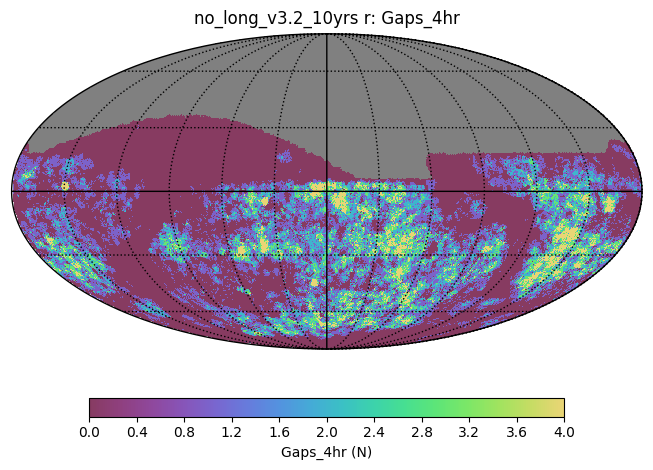

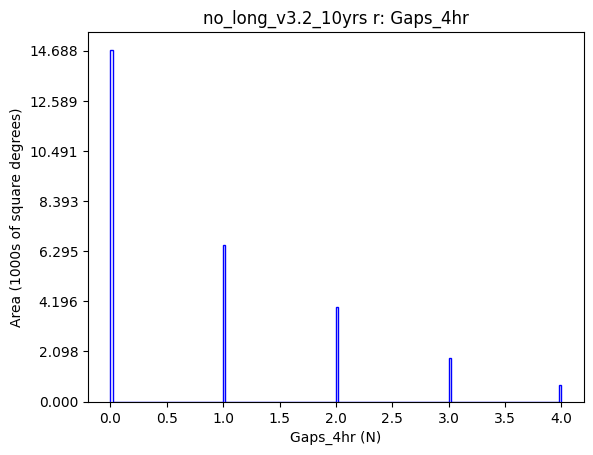

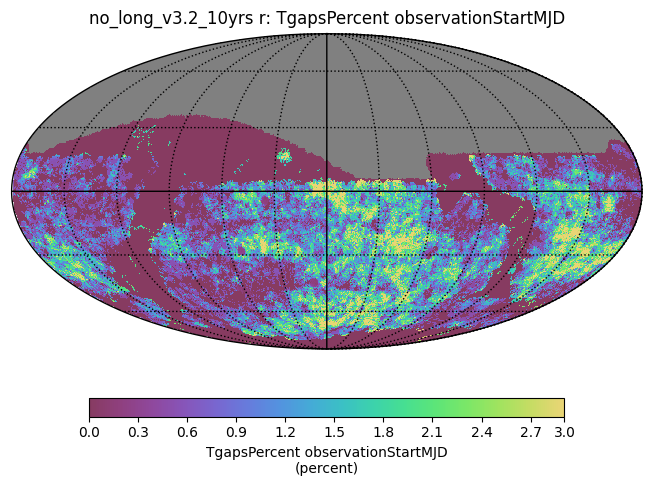

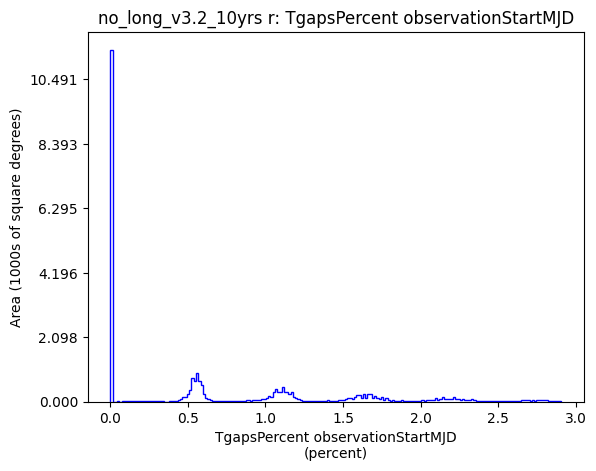

In [5]:
bundle_list = []
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)
summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())
m2 = maf.metrics.GapsMetric(time_scale=gap,
                metric_name="Gaps_%ihr" % gap)

bundle_list.append(
                    maf.MetricBundle(
                    m2,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
metric = maf.metrics.TgapsPercentMetric(min_time=gap/2/24., max_time=gap*1.5/24.)
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median TGP top 18k",
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean TGP top 18k",
    )
)

summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())

bundle_list.append(
                    maf.MetricBundle(
                    metric,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )

bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
bg = maf.MetricBundleGroup(bundle_dict, run_1, out_dir='temp',results_db=None)
bg.run_all()
bg.plot_all(closefigs=False)

In [6]:
print(bundle_list[0].summary_values)
print(bundle_list[1].summary_values)


{'Median N gaps in r at 4hr in top 18k': 1.0, 'Mean N gaps in r at 4hr in top 18k': 1.3603926002774314, 'Mean': 0.8721946115616008, 'Median': 0.0}
{'Median TGP top 18k': 1.098901098901099, 'Mean TGP top 18k': 1.2315930776125328, 'Mean': 0.7896167957037955, 'Median': 0.5524861878453038}


In [7]:
run_1 = 'more_long_v3.2_10yrs.db'
run_name = run_1.replace('.db', '')



/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 500 bins, returning 200
  warnings.warn(


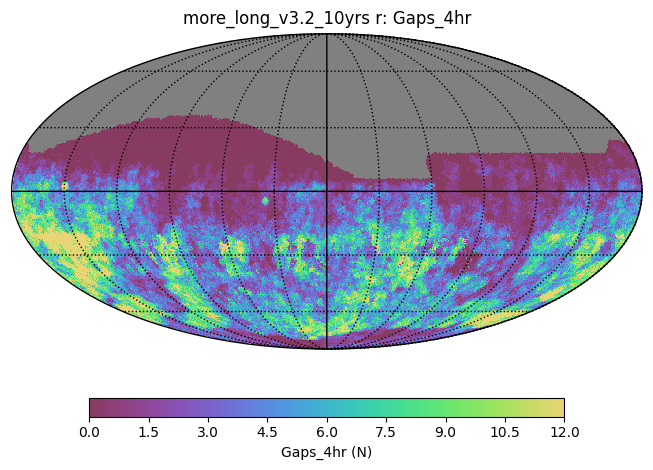

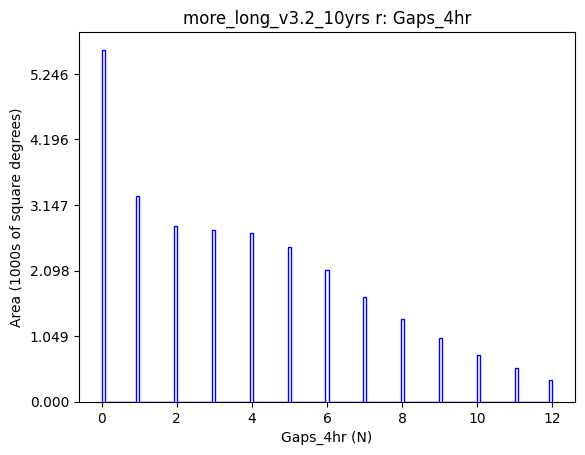

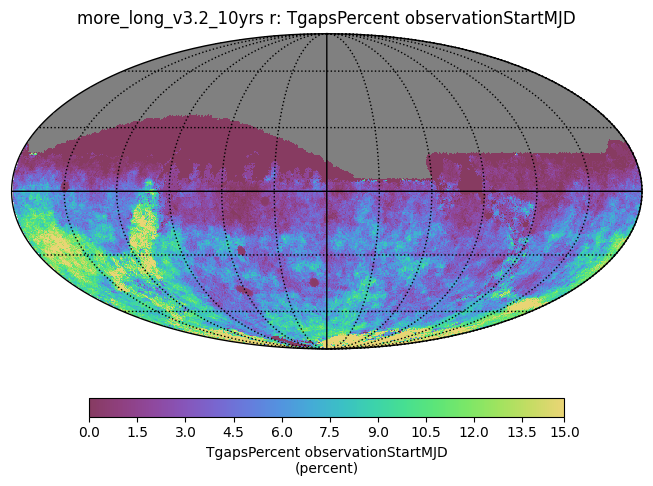

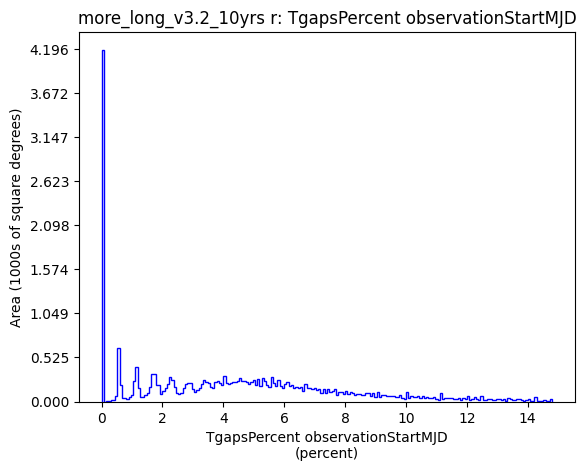

In [8]:
bundle_list = []
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)
summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())
m2 = maf.metrics.GapsMetric(time_scale=gap,
                metric_name="Gaps_%ihr" % gap)

bundle_list.append(
                    maf.MetricBundle(
                    m2,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
metric = maf.metrics.TgapsPercentMetric(min_time=gap/2/24., max_time=gap*1.5/24.)
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median TGP top 18k",
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean TGP top 18k",
    )
)

summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())

bundle_list.append(
                    maf.MetricBundle(
                    metric,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
bg = maf.MetricBundleGroup(bundle_dict, run_1, out_dir='temp',results_db=None)
bg.run_all()
bg.plot_all(closefigs=False)

In [9]:
print(bundle_list[0].summary_values)
print(bundle_list[1].summary_values)


{'Median N gaps in r at 4hr in top 18k': 5.0, 'Mean N gaps in r at 4hr in top 18k': 5.8888526233578515, 'Mean': 3.9738263708839856, 'Median': 3.0}
{'Median TGP top 18k': 6.0109289617486334, 'Mean TGP top 18k': 7.001916271429564, 'Mean': 4.8460770415967005, 'Median': 4.371584699453552}


In [10]:
sql = "filter='%s' and night < %i" % (f, 365.25*5)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 457 bins, returning 200
  warnings.warn(


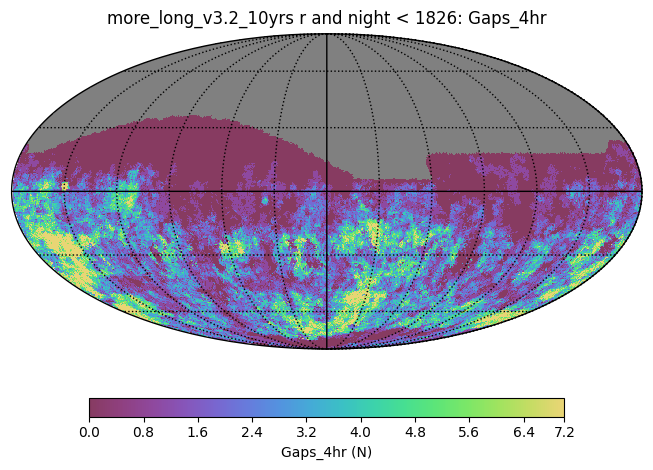

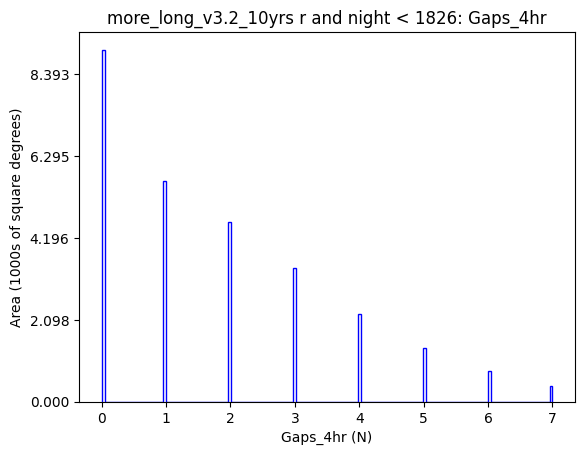

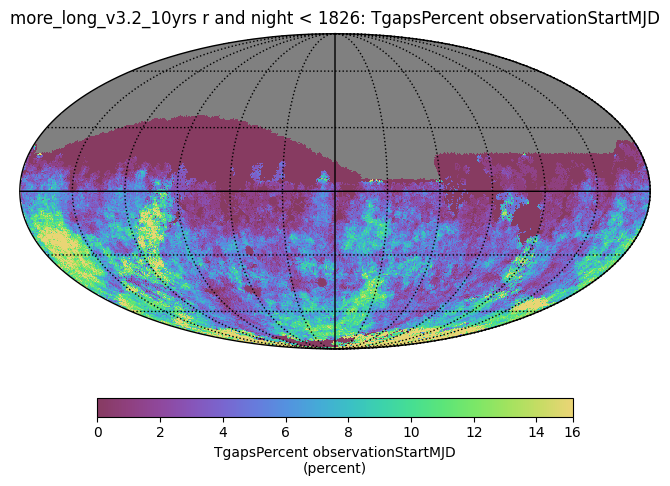

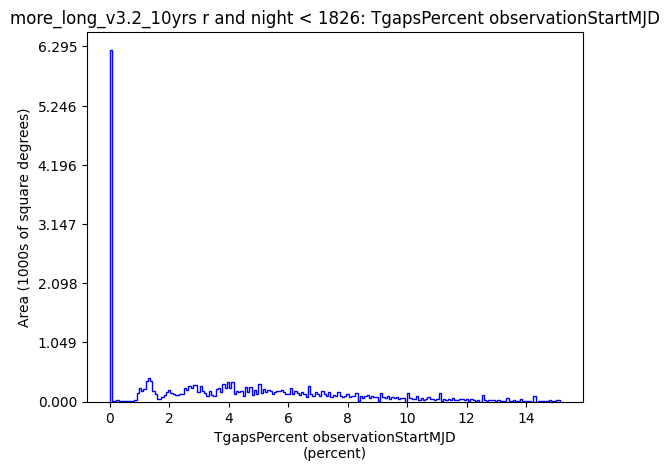

In [11]:
bundle_list = []
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean N gaps in %s at %ihr in top 18k"
        % (f, gap),
    )
)
summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())
m2 = maf.metrics.GapsMetric(time_scale=gap,
                metric_name="Gaps_%ihr" % gap)

bundle_list.append(
                    maf.MetricBundle(
                    m2,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )
metric = maf.metrics.TgapsPercentMetric(min_time=gap/2/24., max_time=gap*1.5/24.)
summary_stats = []
summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.median,
        decreasing=True,
        metric_name="Median TGP top 18k",
    )
)

summary_stats.append(
    maf.metrics.AreaSummaryMetric(
        area=18000,
        reduce_func=np.mean,
        decreasing=True,
        metric_name="Mean TGP top 18k",
    )
)

summary_stats.append(maf.metrics.MeanMetric())
summary_stats.append(maf.metrics.MedianMetric())

bundle_list.append(
                    maf.MetricBundle(
                    metric,
                    healpixslicer,
                    constraint=sql,
                    run_name=run_name,
                    summary_metrics=summary_stats,
                    plot_dict=plot_dict
                )
            )

bundle_dict = maf.make_bundles_dict_from_list(bundle_list)
bg = maf.MetricBundleGroup(bundle_dict, run_1, out_dir='temp',results_db=None)
bg.run_all()
bg.plot_all(closefigs=False)

In [12]:
print(bundle_list[0].summary_values)
print(bundle_list[1].summary_values)


{'Median N gaps in r at 4hr in top 18k': 2.0, 'Mean N gaps in r at 4hr in top 18k': 2.883350624220453, 'Mean': 1.888165534187874, 'Median': 1.0}
{'Median TGP top 18k': 5.825242718446602, 'Mean TGP top 18k': 6.800185420290279, 'Mean': 4.578946267206076, 'Median': 3.9215686274509802}


So TgapsPercent summary stats go up between no_long_v3.2_10yrs and more_long_v3.2_10yrs, but it gets the right answer for the wrong reason as it thinks things are much better in the SCP and dusty plane. The Gaps metric correctly shows that we don't really improve the 4-hour sampling in the SCP between runs.

Then when we move to a 5-year survey, TgapsPercent returns similar values as a 10-year survey, while Gaps correctly drops by a factor of 2.